# 5.3 비용 최소화하기 - 경사하강법

## 경사하강법 파이썬 코드 구현

<단순 선형 회귀로 예측할 만한 데이터 세트 생성>

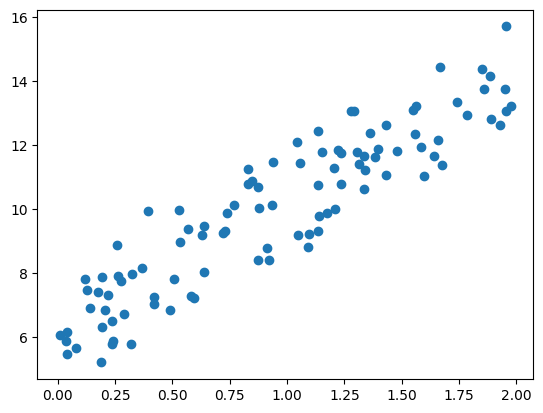

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사(w1 = 4, w0 = 6). 임의의 값은 노이즈를 위해 만듬
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

<비용 함수 정의>

get_cost( ): 실제 y 값과 예측된 y 값을 인자로 받아서 (실제값 - 예측값)의 제곱을 모두 더해 N으로 나눈 값을 계산

In [ ]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred))/N
  return cost

<경사 하강법 함수 생성, 구현>

**gradient_descent( )**

: w0, w1을 모두 0으로 초기화 -> iters 개수만큼 반복하면서 w0, w1 업데이트

- 위에서 무작위로 생성한 X, y를 입력받음
- X, y 모두 넘파이 ndarray


**get_weight_update( )**

: 입력 배열 X값에 대한 예측 배열 y_pred를 구하고 w0, w1 업데이트

- y_pred = np.dot(X, w1.T) + w0

  : 넘파이의 내적 연산인 dot( )이용하여 예측 배열값 계산

  eg) 100개의 데이터 X(1, 2, ..., 100)에 대해 예측값은 w0 + X(1)* w1 + X(2)* w1 + ... + X(100)* w1

  => 입력 배열 X와 w1 배열의 내적과 동일

- w1_update, w0_update 값을 구해 넘파이의 dot행렬 연산으로 계산한 뒤 반환




In [ ]:
# w1과 w0을 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
  N = len(y)

  # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)

  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y - y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1 값을 가진 행렬 생성
  w0_factors = np.ones((N,1))

  # w1, w0를 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

<gradient_descent_steps( ) 함수 생성>

get_weight_updates( )를 경사 하강 방식으로 반복적으로 수행하여 w0, w1 업데이트

In [ ]:
# 입력 인자 iters로 주어진 횟수만큼 만복적으로 w1과 w0을 업데이트 적용함
def gradient_descent_steps(X, y, iters = 10000):
  # w0, w1를 모두 0으로 초기화
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))

  # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

<w1, w0 값 구하고 RSS 계산 함수 생성>

- gradient_descent_steps를 호출해 w1, w0 구하기

- 예측값과 실제값의 RSS 차이를 계산하는 get_cost( ) 함수 생성

- 이를 이용해 경사 하강법의 예측 오류 계산

In [ ]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X, y, iters = 1000)
print("w1: {0:.3f} w0: {0:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0]*X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.022 w0: 4.022
Gradient Descent Total Cost: 0.9935


<회귀선 그리기>

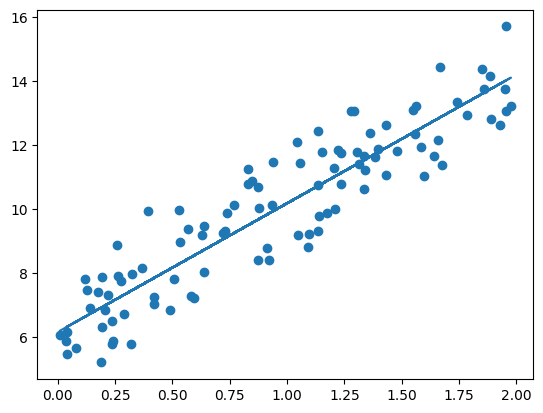

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred)

## 확률적 경사 하강법

: 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 W가 업데이트되는 값을 계산

=> 경사 하강법에 비해 빠른 속도를 보장

=> 대용량 데이터의 경우 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법을 이용해 최적 비용함수를 도출

<(미니 배치) 확률적 경사 하강법을 함수로 구현>

**stochastic_gradient_descent_steps( )**

: gradient_descent_steps와 거의 같음. 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 이를 기반으로 w1_update, w0_update를 계산하는 부분만 차이 있음.

In [ ]:
def stochastic_gradient_descent_steps(X, y, batch_size = 10, iters = 1000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  prev_cost = 100000
  iter_index = 0

  for ind in range(iters):
    np.random.seed(ind)

    # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]

    # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate = 0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

<w1, w0, 예측 오류 비용 계산>

In [ ]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters = 1000)
print("w1: ", round(w1[0,0], 3), "w0: ", round(w0[0,0], 3))
y_pred = w1[0, 0]*X + w0
print('Stochastoc Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1:  4.028 w0:  6.156
Stochastoc Gradient Descent Total Cost: 0.9937


성능 차이가 거의 없지만, 시간이 빠름

# 5.4 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

## 데이터 세트 로드, DataFrame으로 변환

- CRIM: 지역별 범죄 발생률

- ZN: 25000평방피트를 초과하는 거주 지역의 비율

- INDUS:비상업 지역 넓이 비율

- CHAS: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1.아니면 0)

- NOX: 일산화질소 농도

- RM:거주할 수 있는 방 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS:5개 주요 고용센터까지의 가중 거리
- RAD: 고속도로 접근 용이도
- TAX:10,000달러당 재산세율
- PTRATIO:지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT:하위 계층의 비율
- MEDV:본인 소유의 주택 가격(중앙값)


In [2]:
# 필요한 라이브러리 설치
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

# boston 데이터셋 준비
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(data, columns=['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])

# 데이터 세트의 target 배열은 주택 가격임.
# 이를 PRICE 칼럼으로 DataFrame에 추가함.

bostonDF['PRICE'] = target
print('Boston 데이터 세트 크기: ' , bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기:  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


- NULL 값 없으며 모두 float 형

## 각 칼럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화

- 총 8개의 칼럼에 대해 값이 증가할수록 PRICE 값이 어떻게 변하는지 확인
- 시본의 regplot( ) API

  : X, Y 축 값의 산점도와 함께 선형 회귀 직선을 그려줌

- matplotlib.subplot( )
  
  : 각 ax 마다 칼럼과 PRICE의 관계를 표현, 여러 개의 그래프를 한번에 표현하기 위해 자주 사용

  - 인자로 입력되는 ncols: 열 방향으로 위치할 그래프의 개수

  - nrows: 행 방향으로 위치할 그래프의 개수

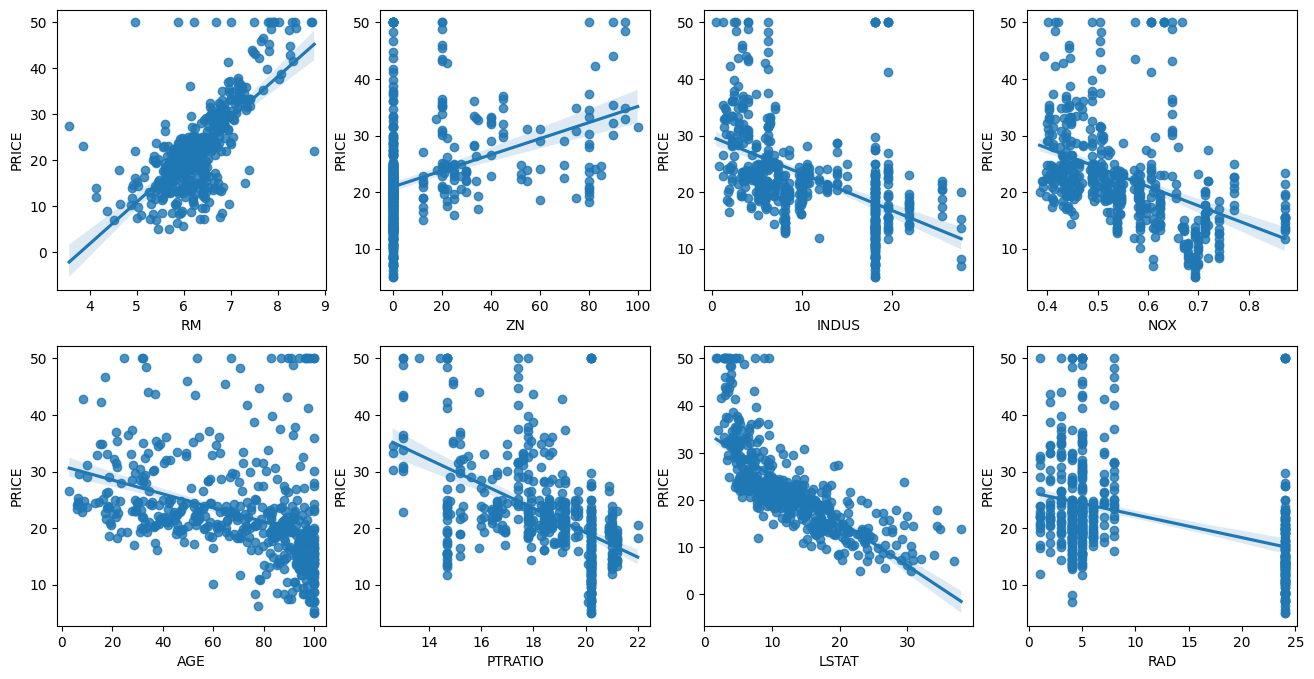

In [7]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐
fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4

  # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x = feature, y = 'PRICE', data = bostonDF, ax = axs[row][col])

- RM(방개수)과 PRICE의 영향도가 두드러지게 나타남 => 양 방형의 선형성 =>  방의 크기가 클수록 가격이 증가

- LSTAT(하위 계층의 비율)는 음 방향의 선형성이 큼 => LSTAT이 적을수록 PRICE가 증가

## 보스턴 주택 가격의 회귀 모델 생성

- LinearRegression 클래스를 이용해 보스턴 주택 가격의 회귀 모델 생성

- train_test_split( )을 이용해 학습과 테스트 데이터 세트를 분리해 학습, 예측 수행

- metrics 모듈의 mean_squared_error( )와 r2_score( ) API를 이용해 MSE와 R2 score 측정

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


## 생성한 주택 가격 모델의 절편과 회귀 계수 값 확인

- 절편은 LinearRegression 객체의 intercept_속성에 저장

- 회귀 계수는 coef_ 속성에 저장

In [9]:
print('절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

절편 값:  40.995595172164826
회귀 계수 값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


coef_ 속성은 회귀 계수 값만 가지고 있으므로 이를 피처별 회귀 계수 값으로 다시 매핑 -> 높은 값 순으로 출력

In [10]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

,0
RM,3.4
CHAS,3.0
RAD,0.4
ZN,0.1
INDUS,0.0
AGE,0.0
TAX,-0.0
B,0.0
CRIM,-0.1
LSTAT,-0.6


## 5개의 폴드 세트에서 교차 검증으로 MSE, RMSE 측정

- 사이킷런은 RMSE 제공을 하지 않으므로 MSE 수치 결과를 RMSE로 변환

- 사이킷런의 Scoring 함수를 호출하면 모델에서 계산된 값에 -1을 곱해서 반환

=> 원래 모델에서 계산된 MSE 값에 -1을 곱하고 sqrt( ) 함수를 적용해 RMSE 값 구하기

In [11]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)
lr = LinearRegression()

# cross_val_score( )로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring = "neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print(' 5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

 5 folds의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
 5 folds의 평균 RMSE: 5.829


# 5.5 다항 회귀와 과(대)적합/과소적합 이해

## 사이킷런에서 다항 회귀 구현

### 단항값을 2차 다항값으로 변환

- 사이킷런은 PolynomiaFeatures 클래스를 통해 피처를 Polynomial(다항식) 피처로 변환

- PolynomialFeatures 클래스
  - degree 파라미터를 통해 입력 받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환
  - 다른 전처리 변환 클래스와 마찬가지로 fit( ), transform( ) 메서드를 통해 변환 작업 수행

In [12]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0, 1], [2, 3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피처: \n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처: \n', poly_ftr)

일차 단항식 계수 피처: 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처: 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


### 3차 다항 계수를 이용해 3차 다항 회귀 함수식 유도

- PloynomialFeatures와 LinearRegression 클래스 이용

- 3차 다항 회귀 함수를 임의로 설정하고 이의 회귀 계수를 예측

In [13]:
# 3차 다항 회귀의 결정함수식 설정하는 함수 생성
def polynomial_func(X):
  y = 1+2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
  return y  # 3차 다항 계수 피처 값이 입력되면 결정 값을 반환

X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


### 일차 단항식 계수 -> 삼차 다항식 계수 변환, 선형회귀에 적용하여 다항 회귀로 구현

In [14]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape: ', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape:  (10,)


### pipeline 객체를 이용한 다항 회귀 구현

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1+2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
  return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree = 3)), ('linear', LinearRegression())])

X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


## 다항 회귀를 이용해 과소적합과 과적합의 문제를 보여주는 예제

- 원래 데이터 세트는 피처 X와 target y가 잡음이 포함된 다항식의 코사인 그래프 관계를 가지도록 만들어줌. 이에 기반해 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도를 비교

### 데이터 생성

- 학습 데이터는 30개의 임의의 데이터인 X, X의 코사인 값에서 약간의 잡음 변동 값을 더한 target인 y로 구성



In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
  return np.cos(1.5*np.pi*X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터임
np.random.seed(0)
n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값임
y = true_fun(X) + np.random.randn(n_samples)*0.1

### 다항식 차수를 변경하면서 예측 결과 비교

- 다항식 차수를 각각 1, 4, 15로 변경
- 다항식 차수별로 학습을 수행한 뒤 cross_val_score()로 MSE 값을 구해 차수별 예측 성능을 평가
- 0부터 1까지 균일하게 구성된 100개의 테스트용 데이터 세트를 이용해 차수별 회귀 예측 곡선 그리기


Degree 1 회귀 계수는 [-1.61]입니다.
Degree 1 MSE는 0.41입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26]입니다.
Degree 4 MSE는 0.04입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08]입니다.
Degree 15 MSE는 181238256.56입니다.


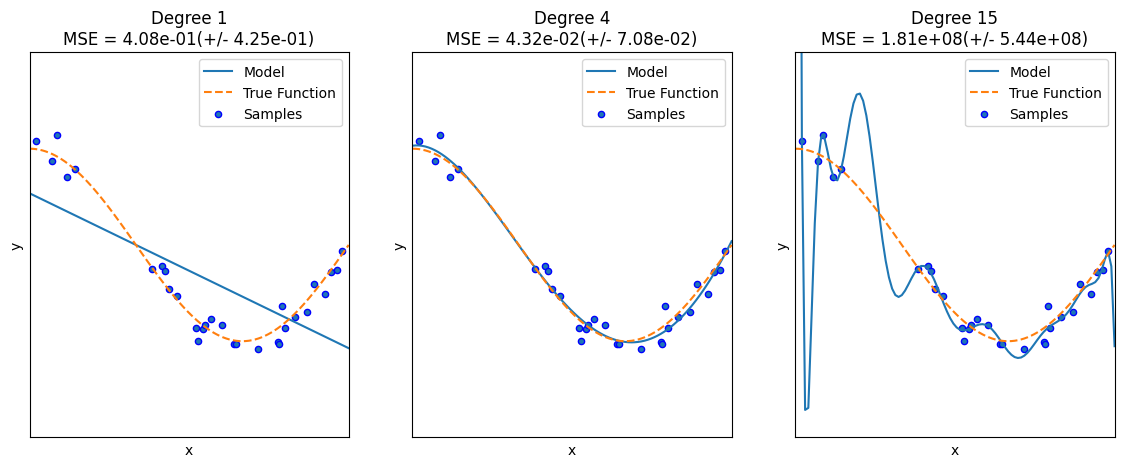

In [17]:
plt.figure(figsize = (14, 5))
degree = [1, 4, 15]

# 다항 회귀의 차수를 1, 4, 15로 각각 변화시키면서 비교
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i+1)
  plt.setp(ax, xticks = (), yticks = ())

  # 개별 degree 별로 Polynomial 변환
  polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("Polynomial_features", polynomial_features),
                       ("Linear_regression", linear_regression)])
  pipeline.fit(X.reshape(-1, 1), y)

  # 교차 검증으로 다항 회귀를 평가
  scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring = "neg_mean_squared_error", cv = 10)

  # pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀 계수 추출
  coefficients = pipeline.named_steps['Linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1}입니다.'.format(degrees[i], np.round(coefficients, 2)))
  print('Degree {0} MSE는 {1:.2f}입니다.'.format(degrees[i], -1*np.mean(scores)))

  # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
  # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
  X_test = np.linspace(0, 1, 100)

  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test.reshape(-1, 1)), label = "Model")
  # 실제값 곡선
  plt.plot(X_test, true_fun(X_test),'--', label = "True Function")
  plt.scatter(X, y, edgecolor = 'b', s = 20, label = "Samples")

  plt.xlabel("x");plt.ylabel("y");plt.xlim((0, 1));plt.ylim((-2, 2));plt.legend(loc = "best")
  plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -1*np.mean(scores), np.std(scores)))

plt.show()

# 5.6 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

## 릿지 회귀

### 보스턴 주택 가격을 ridge 클래스를 이용해 다시 예측, cross_val_score( )로 평가

In [4]:
# 앞의 LinearRegression 예제에서 사용한 피처 데이터 세트인 X_data와 Target 데이터 세트인 y_target을 그대로 이용
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha = 10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 3))
print(' 5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

 5 folds의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds의 개별 RMSE scores:  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds의 평균 RMSE: 5.518


규제가 없는 LinearRegression의 RMSE의 평균보다 뛰어난 예측 성능을 보여줌

### 릿지의 alpha 값을 변화시키면서 RMSE와 회귀 계수 값의 변화 살펴보기

alpha 값을 변화에 따른 5폴드의 RMSE 평균값을 반환



In [5]:
# 릿지에 사용될 alpha 파라미터 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas 리스트 값을 반복하면서 alpha에 따른 평균 RMSE를 구함
for alpha in alphas:
  ridge = Ridge(alpha = alpha)

  # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
  neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
  avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
  print('alpha {0}일 때 5 folds의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

alpha 0일 때 5 folds의 평균 RMSE: 5.829
alpha 0.1일 때 5 folds의 평균 RMSE: 5.788
alpha 1일 때 5 folds의 평균 RMSE: 5.653
alpha 10일 때 5 folds의 평균 RMSE: 5.518
alpha 100일 때 5 folds의 평균 RMSE: 5.330


alpha가 100일때 RMSE가 가장 좋음


### alpha 값의 변화에 따른 피처의 회귀 계수 값을 시각화

회귀 계수를 Ridge 객체의 coef_ 속성에 추출 -> Series 객체로 만들어서 시본 가로 막대 차트로 표시 -> DataFrame에 alpha 값별 회귀 계수로 저장

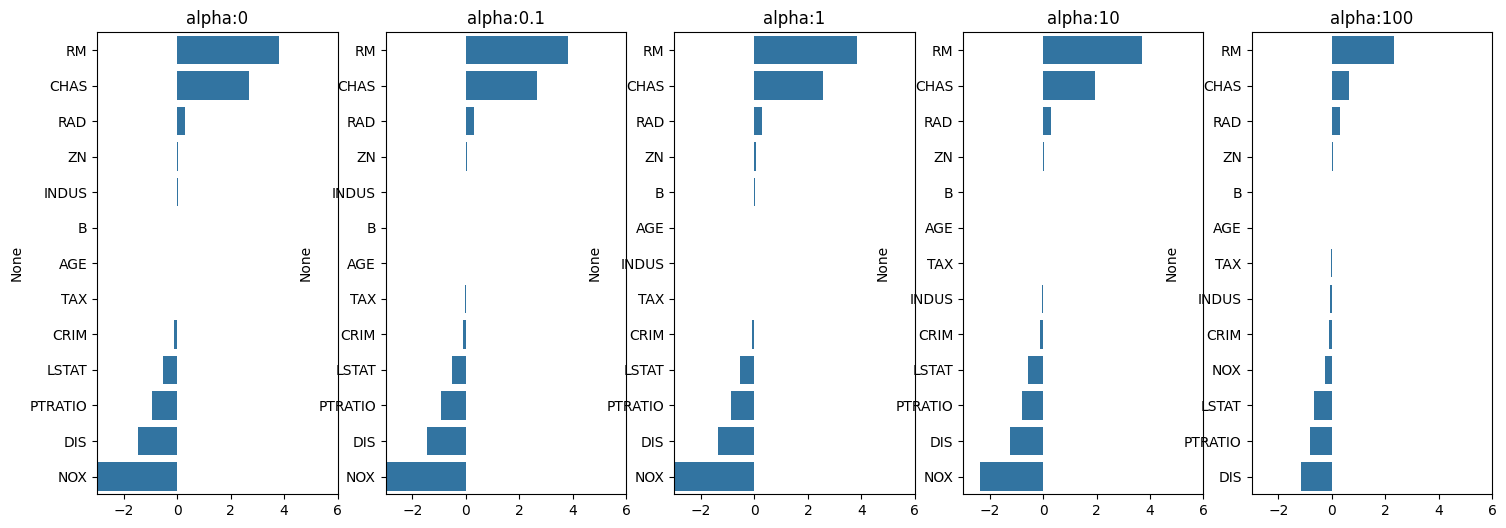

In [7]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize = (18, 6), nrows = 1, ncols = 5)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alpha 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_data, y_target)

  # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
  coeff = pd.Series(data = ridge.coef_, index = X_data.columns)
  colname = 'alpha:' + str(alpha)
  coeff_df[colname] = coeff

  # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
  coeff = coeff.sort_values(ascending = False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3, 6)
  sns.barplot(x = coeff.values, y = coeff.index, ax = axs[pos])

# for문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

- alpha 값을 계속 증가시킬수록 회귀 계수 값은 지속적으로 작아짐
- NOX 피처의 경우, alpha 값을 계속 증가시킴에 따라 회귀 계수가 크게 작아지고 있음

### DataFrame에 저장된 alpha 값의 변화에 따른 릿지 회귀 계수 값 구하기

In [8]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by = sort_column, ascending = False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


- alpha 값이 증가하면서 회귀 계수가 지속적으로 작아지고 있음
- 하지만 릿지 회귀의 경우에는 회귀 계수를 0으로 만들지는 않음

## 라쏘 회귀

### 라쏘의 alpha 값을 변화시키면서 RMSE와 각 피처의 회귀 계수 출력


**<get_linear_reg_eval( ) 생성>**

  : alpha 값을 변화시키면서 결과를 출력하는 함수
  
  - 인자: 회귀 모델의 이름, alpha 값들의 리스트, 피처 데이터 세트, 타깃 데이터 세트
  - 출력: alpha 값에 따른 폴드 평균 RMSE를 출력, 회귀 계수값들은 DF로 반환

In [10]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수 값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params = None, X_data_n = None, y_target_n = None, verbose = True):
  coeff_df = pd.DataFrame()
  if verbose: print('######', model_name, '######')
  for param in params:
    if model_name == 'Ridge':
      model = Ridge(alpha = param)
    elif model_name == 'Lasso':
      model = Lasso(alpha = param)
    elif model_name == 'ElasticNet':
      model = ElasticNet(alpha = param, l1_ratio = 0.7)
    neg_mse_scores = cross_val_score(model, X_data_n, y_target_n,
                                     scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0}일 때 5폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))

    # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
    model.fit(X_data, y_target)

    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data = model.coef_, index = X_data.columns)
    colname = 'alpha:' + str(param)
    coeff_df[colname] = coeff

  return coeff_df
# end of get_liner_regre_eval

**<함수를 이용해 alpha 값의 변화에 따른 RMSE와 그때의 회귀계수 출력>**

In [11]:
# 라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval( )호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data_n = X_data, y_target_n = y_target)

###### Lasso ######
alpha 0.07일 때 5폴드 세트의 평균 RMSE: 5.612
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.615
alpha 0.5일 때 5폴드 세트의 평균 RMSE: 5.669
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.776
alpha 3일 때 5폴드 세트의 평균 RMSE: 6.189


alpha가 0.07일 때 가잘 좋은 평균 RMSE를 보여줌

### alpha 값에 따른 피처별 회귀 계수

In [12]:
# 반환된 coeff_lasso_df를 첫번째 칼럼 순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by = sort_column, ascending = False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


- alpha의 크기가 증가함에 따라 일부 피처의 회귀 계수는 아예 0으로 바뀌고 있음
- NOX 속성은 alpha가 0.07일 때부터 회귀 계수가 0
- alpha를 증가시키면서 INDUS, CHAS와 같은 속성의 회귀 계수가 0으로 바뀜
- 회귀 계수가 0인 피처는 회귀 식에서 제외되면서 피처 선택의 효과를 얻을 수 있음


## 엘라스틱넷 회귀

### 엘라스틱넷 alpha 값을 변화시키면서 RMSE와 각 피처의 회귀 계수 출력

- 앞서 생성한 함수 이용
- alpha 값의 변화만 살피기 위해 l1_ratio는 0.7로 고정

In [13]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval( )함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params = elastic_alphas,
                                       X_data_n = X_data, y_target_n = y_target)

###### ElasticNet ######
alpha 0.07일 때 5폴드 세트의 평균 RMSE: 5.542
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.526
alpha 0.5일 때 5폴드 세트의 평균 RMSE: 5.467
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.597
alpha 3일 때 5폴드 세트의 평균 RMSE: 6.068


### alpha 값에 따른 피처별 회귀 계수

In [14]:
# 반환된 coedd_elastic_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by = sort_column, ascending = False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


- alpha = 0.5일 때 가장 좋은 예측 성능 보임
- alpha 값에 따른 피러들의 회귀 계수들 값이 라쏘보다는 상대적으로 0이 되는 값이 적음

## 선형 회귀 모델을 위한 데이터 변환

- 보스턴 주택가격 피처 데이터 세트에서 표준 정규 분포 변환, 최댓값/최솟값 정규화, 로그 변환을 차례로 적용한 후 RMSE로 각 경우별 예측  성능 측정

### get_scaled_data( ) 함수 생성

- method 인자로 변환 방법을 결정
- 표준 정규 분포 변환, 최댓값/최솟값 정규화/로그 변환 중 하나 선택
- p_degree: 다항식 특성을 추가할 때 다항식 차수가 입력

  => 다항식 차수는 2를 넘기지 않음

- np.log1p( ): log( ) 함수를 적용하면 언더 플로우가 발생하기 쉬워서 1+log( ) 함수를 적용

In [21]:
# method는 표준 정규 분포 변환(Standard), 최댓값/최솟값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다항식 특성을 추가할 때 적용. p_degree는 2 이상 부여하지 않음
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
        scaled_data = pd.DataFrame(scaled_data, columns=input_data.columns)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
        scaled_data = pd.DataFrame(scaled_data, columns=input_data.columns)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)  # log() 함수 적용 -> 언더 플로우(연산 결과로 저장할 수 있는 범위 넘어서면 갑자기 큰 수가 나옴 ) => np.log1p: 1+log()
    else:
        scaled_data = input_data

    if p_degree != None:
        poly = PolynomialFeatures(degree=p_degree, include_bias=False)
        scaled_data = poly.fit_transform(scaled_data)
        feature_names = poly.get_feature_names_out(input_data.columns)
        scaled_data = pd.DataFrame(scaled_data, columns=feature_names)
    return scaled_data

### Ridge 클래스의 alpha 값을 변화시키면서 피처 데이터 세트를 여러 방법으로 변환한 데이터 세트를 입력받을 경우에 RMSE 값이 어떻게 변하는지 확인

- 앞서 생성한 get_lineat_reg_eval( ) 함수 이용
- 피처 변환 방법은 5가지
    - (None, None): 아무 변환을 하지 않은 원본 데이터
    - ('Standard', None): 표준 정규 분포
    - ('Standard', 2): 표준 정규 분포를 다시 2차 다항식 변환
    - ('MinMax', None): 최솟값/최댓값 정규화
    - ('MinMax', 2): 최솟값/최댓값 정규화를 다시 2차 다항식 변환
    - ('Log', None): 로그 변환

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
import numpy as np
import pandas as pd

# Ridge의 alpha 값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas = [0.1, 1, 10, 100]

# 5개의 방식으로 변환
scale_methods = [(None, None), ('Standard', None), ('Standard', 2),
  ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
  X_data_scaled = get_scaled_data(method = scale_method[0], p_degree = scale_method[1], input_data = X_data)
  print('\n## 변환 유형: {0}, Polynomial Degree: {1}'.format(scale_method[0], scale_method[1]))
  get_linear_reg_eval('Ridge', params = alphas, X_data_n = X_data_scaled, y_target_n = y_target, verbose = False)


## 변환 유형: None, Polynomial Degree: None
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.788
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.653
alpha 10일 때 5폴드 세트의 평균 RMSE: 5.518
alpha 100일 때 5폴드 세트의 평균 RMSE: 5.330

## 변환 유형: Standard, Polynomial Degree: None
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.826
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.803
alpha 10일 때 5폴드 세트의 평균 RMSE: 5.637
alpha 100일 때 5폴드 세트의 평균 RMSE: 5.421

## 변환 유형: Standard, Polynomial Degree: 2
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 8.827
alpha 1일 때 5폴드 세트의 평균 RMSE: 6.871
alpha 10일 때 5폴드 세트의 평균 RMSE: 5.485
alpha 100일 때 5폴드 세트의 평균 RMSE: 4.634

## 변환 유형: MinMax, Polynomial Degree: None
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.764
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.465
alpha 10일 때 5폴드 세트의 평균 RMSE: 5.754
alpha 100일 때 5폴드 세트의 평균 RMSE: 7.635

## 변환 유형: MinMax, Polynomial Degree: 2
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.298
alpha 1일 때 5폴드 세트의 평균 RMSE: 4.323
alpha 10일 때 5폴드 세트의 평균 RMSE: 5.185
alpha 100일 때 5폴드 세트의 평균 RMSE: 6.538

## 변환 유형: Log, Polynomial Degree: None
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 4.770
alpha 1일

# 5.7 로지스틱 회귀

## 위스콘신 유방암 데이터 실습

### 전체 데이터 세트 생성

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

### 학습/테스트 데이터 세트로 나누기
- 선형 회귀 계열의 로지스틱 회귀는 데이터의 정규 분포도에 따라 예측 성능 영향을 받을 수 있음

  => 데이터에 먼저 정규 분포 형태의 표준 스케일링을 적용한 뒤에 데이터 세트 분리

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target,
                                                    test_size = 0.3, random_state = 0)

### 로지스틱 회귀를 이용해 학습 및 예측 수행, 정확도와 ROC-AUC 값 구하기

In [26]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용해 학습 및 예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# 정확도와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy: 0.977
roc_auc: 0.972


### 하이퍼 파라미터 최적화

- 사이킷런 LogisticRegression 클래스의 주요 하이퍼 파라미터: penalty, C
- penalty: 규제의 유형을 설정(l2, l1)

  => 디폴트는 l2
- C: 규제 강도를 조절하는 alpha 값의 역수

  => C = 1/alpha
  => C 값이 작을수록 규제 강도가 큼

In [27]:
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2', 'l1'],
          'C': [0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid = params, scoring = 'accuracy', cv = 3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터: {0}, 최적 평균 정확도: {1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터: {'C': 1, 'penalty': 'l2'}, 최적 평균 정확도: 0.975


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

# 5.8 회귀 트리

## 랜덤 포레스트 회귀 트리인 RandomForestRegressor를 이용한 보스턴 주택 가격 예측

In [28]:
# 필요한 라이브러리 설치
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

from scipy import stats

# boston 데이터셋 준비
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(data, columns=['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])

# 데이터 세트의 target 배열은 주택 가격임.
# 이를 PRICE 칼럼으로 DataFrame에 추가함.

bostonDF['PRICE'] = target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

rf = RandomForestRegressor(random_state = 0, n_estimators = 1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print(' 5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

 5 folds의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
 5 folds의 개별 RMSE scores:  [2.81 3.63 4.54 6.8  4.34]
 5 folds의 평균 RMSE: 4.423


## 랜덤 포레스트, 결정 트리, GBM, XGBoost, LightGBM의 Regressor를 이용한 보스턴 주택 가격 예측

### get_model_cv_prediction( ) 함수 생성

  : 입력 모델과 데이터 세트를 입력 받아 교차 검증으로 평균 RMSE를 계산해주는 함수

In [29]:
def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores = cross_val_score(model, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
  rmse_scores = np.sqrt(-1 * neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  print('##### ', model.__class__.__name__, ' #####')
  print(' 5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

### 다양한 유형의 회귀 트리 생성, 예측

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state = 0, max_depth = 4)
rf_reg = RandomForestRegressor(random_state = 0, n_estimators = 1000)
gb_reg = GradientBoostingRegressor(random_state = 0, n_estimators = 1000)
xgb_reg = XGBRegressor(n_estimators = 1000)
lgb_reg = LGBMRegressor(n_estimators = 1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
  get_model_cv_prediction(model, X_data, y_target)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

## 피처별 중요도 시각화

- 회귀 트리 Regressor 클래스는 선형 회귀와 다른 처리 방식이므로 회귀 계수를 제공하는 coef_속성이 없음

  => 대신 feature_importances_ 이용

<Axes: xlabel='None', ylabel='None'>

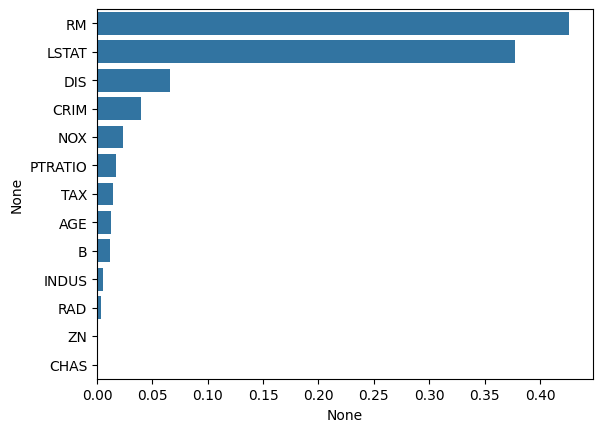

In [31]:
import seaborn as sns
%matplotlib inline

rf_lef = RandomForestRegressor(n_estimators = 1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data = rf_reg.feature_importances_, index = X_data.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index)

## 하이퍼 파라미터 튜닝

- 분류 트리 Classifier의 하이퍼 파라미터와 동일

  => 4장 참조

## 회귀트리 Regressor와 선형 회귀의 예측값 판단 비교

- 결정 트리의 하이퍼 파라미터 max_depth의 크기를 변화시키면서 어떻게 회귀 트리 예측선이 변화하는지 확인
- 2차원 평면상에서 회귀 예측선을 쉽게 표현하기 위해 1개의 변수만 추출
- Price와 가장 밀접한 양의 상관관계를 가지는 RM 칼럼만 이용
- 선형 회귀와 결정 트리 회귀로 PRICE 예측 회귀선 표현

#### 데이터 샘플링



- 보스턴 데이터 세트의 개수를 100개만 샘플릴하고 RM과 PRICE 칼럼만 추출

  => 2차원 평면상에서 X축에 독립변수인 RM, Y축에 종속변수인 PRICE만을 가지고 직관적으로 예측값을 시각화

(100, 2)


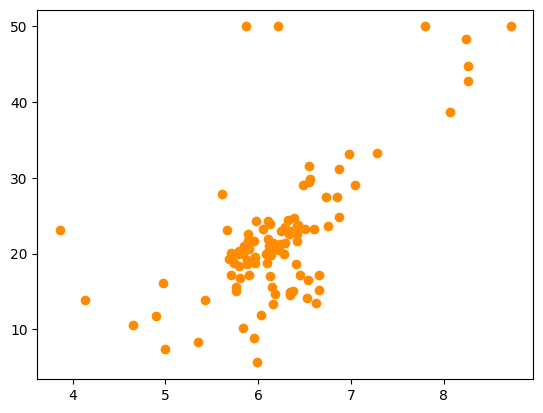

In [32]:
bostonDF_sample = bostonDF[['RM', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n = 100, random_state = 0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = 'darkorange')

#### max_depth 크기를 변화시키며 학습, 예측

- LinearRegression과 DecisionTreeRegressor를 max_depth를 각각 2, 7로 해서 학습
- 학습된 Regressor에 RM 값을 4.5~8.5까지의 100개의 테스트 데이터 세트로 제공했을 때 예측값 구하기

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
dt_reg1 = DecisionTreeRegressor(max_depth = 2)
dt_reg2 = DecisionTreeRegressor(max_depth = 7)

# 실제 예측을 적용할 테스트용 데이터 세트를 4,5~8.5까지의 100개의 데이터 세트로 생성
X_test = np.arange(4.5, 7.5, 0.04).reshape(-1, 1)

# 보스턴 주택 가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1, 1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1, 1)

# 학습과 예측 수행
lr_reg.fit(X_feature, y_target)
dt_reg1.fit(X_feature, y_target)
dt_reg2.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_dt1 = dt_reg1.predict(X_test)
pred_dt2 = dt_reg2.predict(X_test)

#### 학습된 Regressor에서 예측한 Price 회귀선 그리기

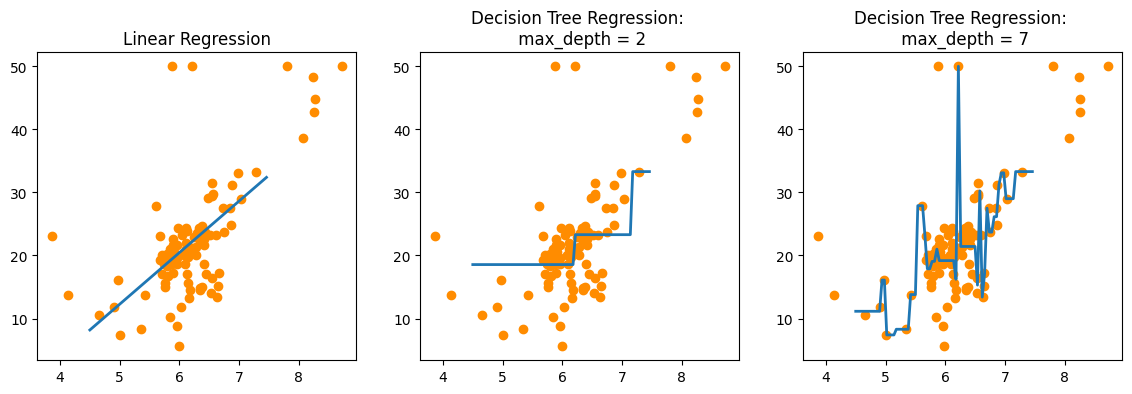

In [35]:
fif, (ax1, ax2, ax3) = plt.subplots(figsize = (14, 4), ncols = 3)

# X축 값을 4.5~8.5로 변환하며 입력했을 때 선형 회ㅟ와 결정 트리 회귀 예측선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = 'darkorange')
ax1.plot(X_test, pred_lr, label = 'linear', linewidth = 2)

# DecisionTreeREgressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth = 2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = 'darkorange')
ax2.plot(X_test, pred_dt1, label = 'max_depth = 2', linewidth = 2)

# DecisionTreeREgressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth = 7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = 'darkorange')
ax3.plot(X_test, pred_dt2, label = 'max_depth = 7', linewidth = 2)

- 선형 회귀: 직선으로 예측 회귀선을 표현
- 회귀 트리: 분할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태로 회귀선 만듬
- DecisionTreeRegressor의 max_depth = 7인 경우: 학습 데이터 세트의 이상치 데이터도 학습하면서 복잡한 계단 형태의 회귀선을 만들어 과적합이 되기 쉬운 모델이 되었음
